In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/My_Data/Sale_price_prediction/dataset/TRAIN.csv")
test = pd.read_csv("/content/drive/MyDrive/My_Data/Sale_price_prediction/dataset/TEST.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
train.drop("Customers",axis=1,inplace=True)

In [ ]:
display(train.head(3),test.head(3))

,Store,DayOfWeek,Date,Sales,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,1,1,0,1
1,2,5,2015-07-31,6064,1,1,0,1
2,3,5,2015-07-31,8314,1,1,0,1


,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,767,1,2013-04-01,0,0,b,1
1,1111,6,2013-03-16,1,0,0,0
2,45,4,2013-08-01,1,1,0,1


In [ ]:
def date_time(data):
  
  data["Date"] = pd.to_datetime(data['Date'], errors='coerce')
  data["Year"] = data.Date.dt.year
  data["Month"] = data.Date.dt.month
  data["Day"] = data.Date.dt.day

date_time(train)
date_time(test)

train.drop("Date",axis=1,inplace=True)
test.drop("Date",axis=1,inplace=True)

In [ ]:
train["StateHoliday"] = train["StateHoliday"].astype(str)
test["StateHoliday"] = test["StateHoliday"].astype(str)

In [ ]:
## We are dropping StateHoliday=='c' as the testdataset doesn't have this parameter
#train.drop(index = train[train["StateHoliday"]=='c'].index,inplace=True)

In [ ]:
def mapping(data):
  data.StateHoliday = data.StateHoliday.map({'0':0,'a':1,'b':2,'c':3})

mapping(train)
mapping(test)

In [ ]:
holidays1=train['StateHoliday']
holidays2=test['StateHoliday']

train['StateHoliday_a']=(holidays1=='a')*1.0
train['StateHoliday_b']=(holidays1=='b')*1.0
train['StateHoliday_c']=(holidays1=='c')*1.0

test['StateHoliday_a']=(holidays2=='a')*1.0
test['StateHoliday_b']=(holidays2=='b')*1.0
test['StateHoliday_c']=(holidays2=='c')*1.0

In [ ]:
train.drop(["StateHoliday"],axis=1,inplace=True)
test.drop(["StateHoliday"],axis=1,inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

def label_encoding(data):
   data[["StateHoliday"]] = data[["StateHoliday"]].apply(le.fit_transform)


label_encoding(train)
label_encoding(test)

In [ ]:
X = train.drop("Sales",axis=1)
y = train.Sales

In [ ]:



## We try to scale the data as there are diiferent range of values
def Standard_Scaling(data):
  from sklearn.preprocessing import StandardScaler
  scaler = StandardScaler()
  feature_scale = [feature for feature in data.columns]
  data = pd.DataFrame(scaler.fit_transform(data[feature_scale]),columns = feature_scale)
  return data


X = Standard_Scaling(X)
test = Standard_Scaling(test)

# Model Creation

In [ ]:
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from xgboost import XGBRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()

In [ ]:
reg_rf.fit(X_train, y_train)
pred = reg_rf.predict(X_test)

Root mean squared error for RandomForestRegression is 1595.8085849816455 and the R2 value of the model is 0.8042792589599107


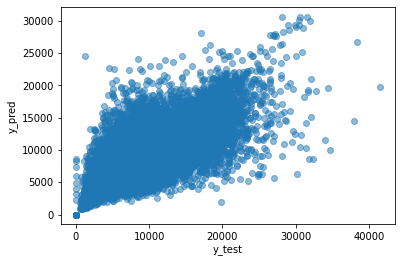

In [ ]:
print('Root mean squared error for RandomForestRegression is {} and the R2 value of the model is {}'.format(np.sqrt(mean_squared_error(y_test,pred)),r2_score(pred,y_test)))
plt.scatter(y_test, pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()




In [ ]:
prediction = reg_rf.predict(test)
prediction = pd.DataFrame(prediction,columns=["Sales"])
prediction.index.names=["Index"]
prediction.head()

,Sales
Index,
0,0.00
1,3561.27
2,6631.91
3,4143.18
4,7489.64


In [ ]:
prediction.to_csv("pred_file.csv")

# Combined Models

RandomForestRegressor: 1603.722740047819


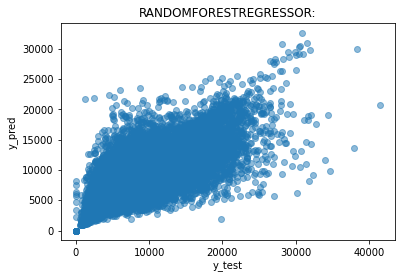

[14:35:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XgBoost Regressor: 2356.685043388928


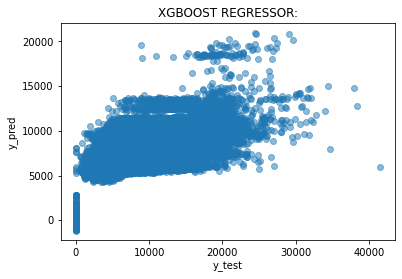

Extra Tree Regressor: 3393.7786020976937


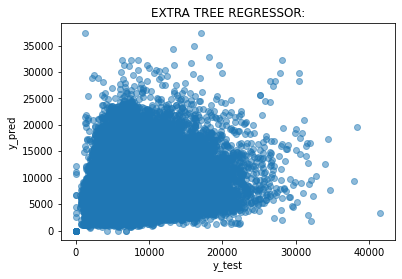

Lasso Regressor: 2643.0650827699037


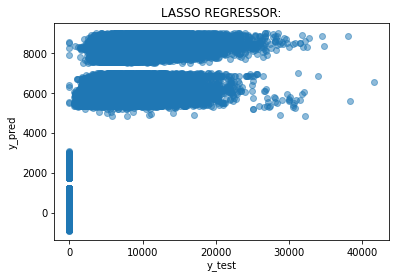

In [ ]:
models = [["RandomForestRegressor:",RandomForestRegressor()],
          ["XgBoost Regressor:",XGBRegressor()],
          ["Extra Tree Regressor:", ExtraTreeRegressor()],
          ["Lasso Regressor:", Lasso()]
          ]


for model_name,model_type in models:
  model = model_type
  model.fit(X_train,y_train)
  pred=model.predict(X_test)

  print(model_name,np.sqrt(mean_squared_error(pred,y_test)))
  plt.scatter(y_test, pred, alpha = 0.5)
  plt.title(model_name.upper())
  plt.xlabel("y_test")
  plt.ylabel("y_pred")
  plt.show()


Hyperparameter tuning


In [ ]:
# Number of trees in random forest
n_estimators = [20,50,90,100,125,150,200]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,5,9,15,25,35,40]
# Minimum number of samples required to split a node
min_samples_split = [5, 10]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split}



rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid, n_iter = 10, cv = 10, verbose=2, random_state=42, n_jobs = -1, scoring='neg_mean_squared_error')
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 43.9min
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 113.8min finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                             

In [ ]:
rf_random.best_params_

{'max_depth': 40,
 'max_features': 'auto',
 'min_samples_split': 5,
 'n_estimators': 50}

In [ ]:
rf_random.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=40, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [ ]:
from sklearn.model_selection import cross_val_score

random_reg = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=40, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)



#score = cross_val_score(random_reg,X_train,y_train,cv=10)

In [ ]:
random_reg.fit(X_train,y_train)

In [ ]:
display(pd.DataFrame(random_reg.predict(X_test),y_test))

,0
Sales,
16698,16884.894881
0,0.000000
7485,7763.954976
3352,3514.098995
5927,5745.298517
...,...
7016,7033.101238
5056,4770.570655
7293,6881.977643


In [ ]:
prediction = random_reg.predict(test)
prediction = pd.DataFrame(prediction,columns=["Sales"])
prediction.index.names=["Index"]
prediction.head()
prediction.to_csv("pred_file.csv")